In [ ]:
#NAME:- SIDHANT SANGAM
#ROLL NO:- 2206216
#DATA ANALYTICS LAB SOLUTIONS

**QUESTION - 1**

In [ ]:
'''Use linear regression to fit a straight line to the given database. Set your learning rate to 0.5.
What are the cost function value and learning parameters values after convergence?
Also, mention the convergence criteria you used.'''
#answers:-
'''The current implementation uses a fixed number of epochs (epochs=1000) as the convergence criterion. 
The gradient descent algorithm iterates for the specified number of epochs, regardless of whether the model has converged.
To improve the convergence criterion, we can implement an early stopping mechanism based on the change in the loss function (Mean Squared Error). 
For example, we could stop the training if the change in MSE between consecutive iterations falls below a small threshold.

Final Parameters (Theta): [0.9966201 0.0013402]
Cost Function Value after Convergence: 1.1947898109836605e-06
Converged after iterations: 9


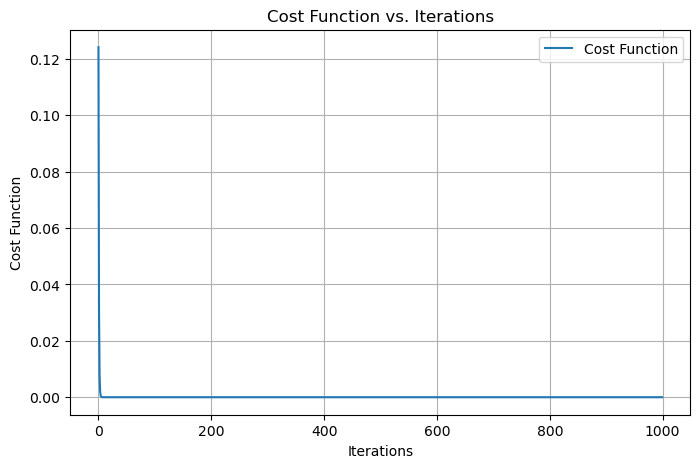

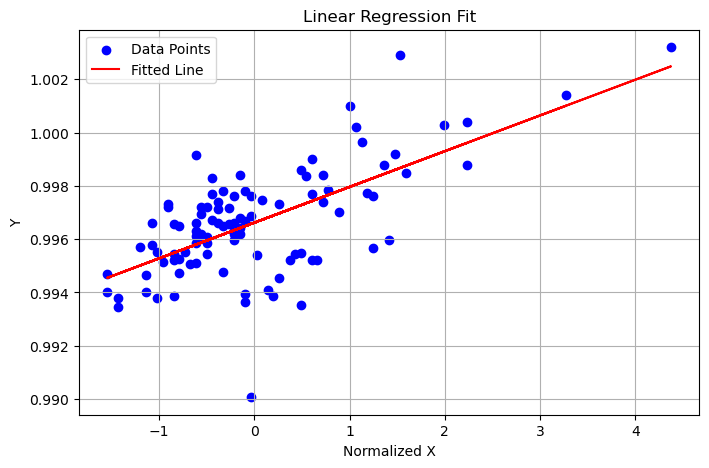

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

linearX = pd.read_csv("linearX.csv", header=None)
linearY = pd.read_csv("linearY.csv", header=None)

X = linearX.values.flatten()
Y = linearY.values.flatten()

X_mean = np.mean(X)
X_std = np.std(X)
X_normalized = (X - X_mean) / X_std


X_train = np.c_[np.ones(len(X_normalized)), X_normalized]

alpha = 0.5
iterations = 1000
m = len(Y)


theta = np.zeros(2)


#Cost Function
def compute_cost(X, Y, theta):
    predictions = X @ theta
    errors = predictions - Y
    return (1 / (2 * m)) * np.sum(errors**2)


# Gradient Descent
def gradient_descent(X, Y, theta, alpha, iterations):
    cost_history = []  # Store cost for each iteration
    for _ in range(iterations):
        predictions = X @ theta
        errors = predictions - Y
        gradients = (1 / m) * (X.T @ errors)
        theta -= alpha * gradients
        cost_history.append(compute_cost(X, Y, theta))
    return theta, cost_history


theta_final, cost_history = gradient_descent(X_train, Y, theta, alpha, iterations)

tolerance = 1e-6
converged_iteration = next(
    (i for i, diff in enumerate(np.diff(cost_history)) if abs(diff) < tolerance), iterations
)


print("Final Parameters (Theta):", theta_final)
print("Cost Function Value after Convergence:", cost_history[-1])
print("Converged after iterations:", converged_iteration)


#Graph plotting

plt.figure(figsize=(8, 5))
plt.plot(cost_history, label='Cost Function')
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.legend()
plt.grid()
plt.show()


# Plot the data points and the fitted line
plt.figure(figsize=(8, 5))
plt.scatter(X_normalized, Y, color='blue', label='Data Points')
plt.plot(X_normalized, X_train @ theta_final, color='red', label='Fitted Line')
plt.title('Linear Regression Fit')
plt.xlabel('Normalized X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

**QUESTION - 2**

In [29]:
#The cost function that we are using in this assignment is different than the one we used in class.
#Can you think of the advantage of averaging the cost?

#Solutions:-
#Advantages of averaging the cost are:-
#1.Avoids Overfitting During Training
#2.Scalability with Larger Datasets:
#3.Consistency in Learning Rate:
#4.Better Interpretability
#5.Stable Convergence:

**QUESTION- 3**

In [31]:
#Plot cost function v/s iteration graph for the model in question 1 for first 50 iterations.

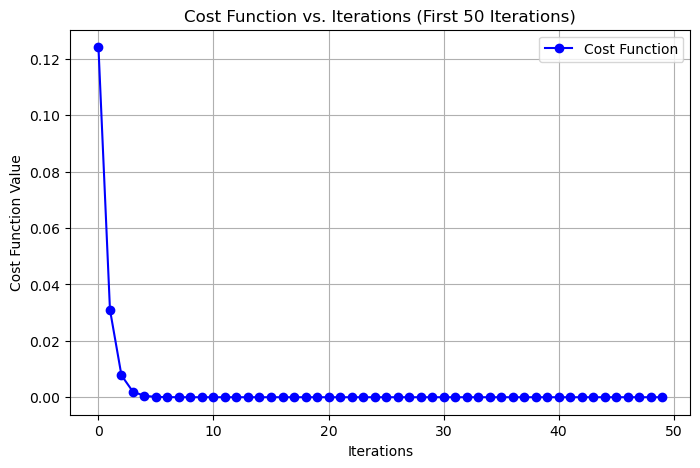

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(range(50), cost_history[:50], marker='o', color='blue', label='Cost Function')
plt.title("Cost Function vs. Iterations (First 50 Iterations)")
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.legend()
plt.grid()
plt.show()

**QUESTION - 4**

In [35]:
#Plot the given dataset on a graph and also print the straight line you obtained in question 1 to show how it fits the data.

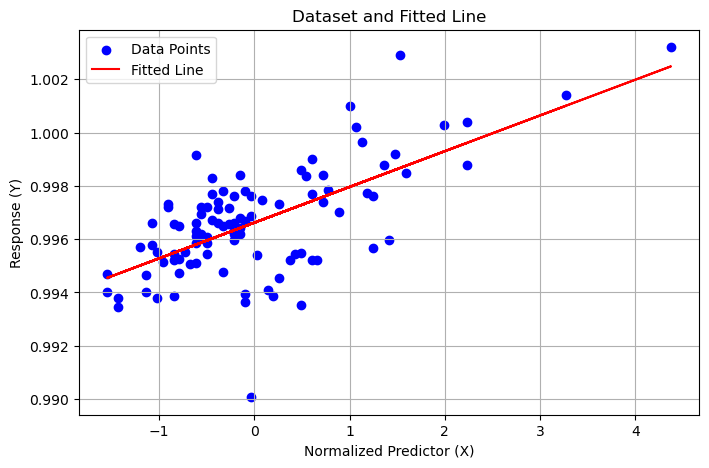

In [37]:
plt.figure(figsize=(8, 5))
plt.scatter(X_normalized, Y, color='blue', label='Data Points')
plt.plot(X_normalized, X_train @ theta_final, color='red', label='Fitted Line')
plt.title("Dataset and Fitted Line")
plt.xlabel("Normalized Predictor (X)")
plt.ylabel("Response (Y)")
plt.legend()
plt.grid()
plt.show()

**QUESTION - 5**

In [39]:
#Test your regression model with the learning rates lr = 0.005, lr = 0.5, lr = 5
#For each learning rate, plot a graph showing how the cost function changes for the first 50 iterations and write your
#observation.

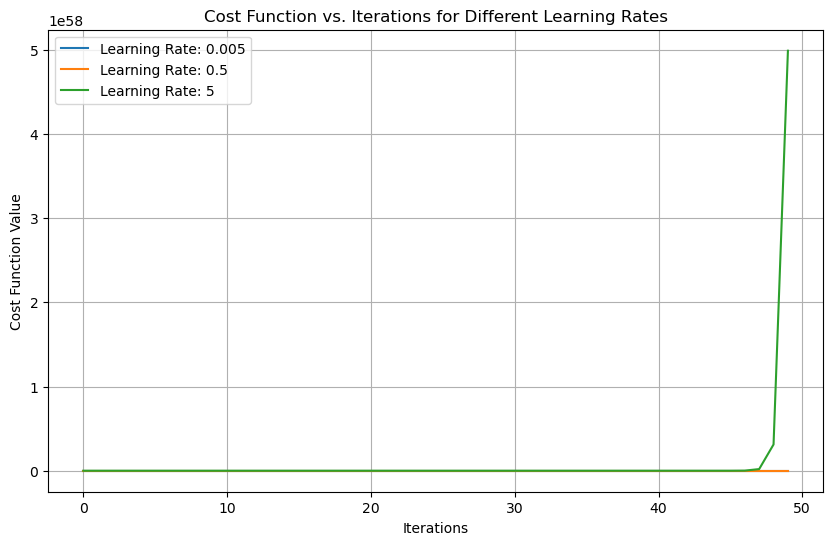

In [41]:
if X_train.shape[1] == 1:
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

Y = Y.reshape(-1, 1)

# Function to perform gradient descent for a given learning rate
def gradient_descent_with_lr(X, Y, lr, iterations):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_history = []

    for _ in range(iterations):
        
        predictions = X @ theta
       
        gradients = (1 / m) * (X.T @ (predictions - Y))
        
        theta -= lr * gradients
        
        cost = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)
        cost_history.append(cost)

    return theta, cost_history

learning_rates = [0.005, 0.5, 5]
iterations = 50
cost_histories = {}


for lr in learning_rates:
    _, cost_history = gradient_descent_with_lr(X_train, Y, lr, iterations)
    cost_histories[lr] = cost_history


plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(range(iterations), cost_histories[lr], label=f'Learning Rate: {lr}')

plt.title("Cost Function vs. Iterations for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.legend()
plt.grid()
plt.show()

**QUESTION - 6**

In [43]:
#Choose a suitable learning rate, then implement stochastic and
#min-batch gradient descent, plot the cost function against
#iteration, and observe how your cost function changes compared
#to batch gradient descent.

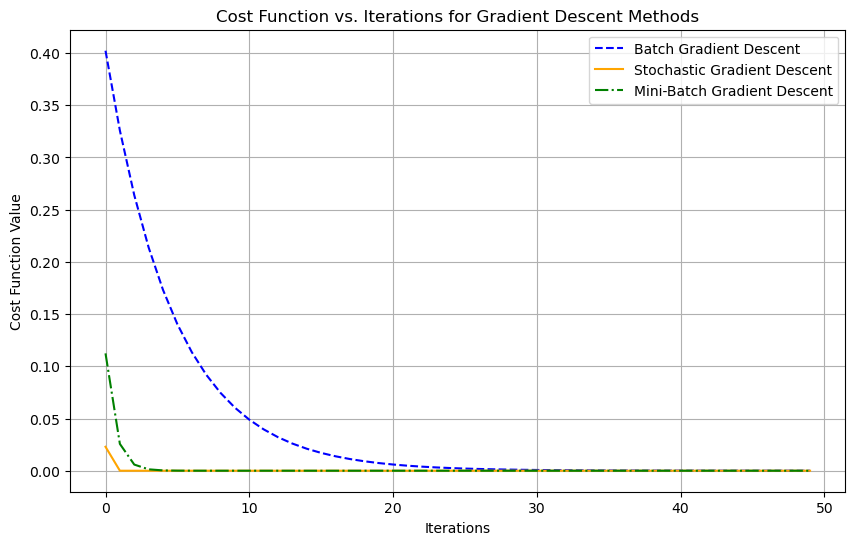

In [47]:
X = (linearX - np.mean(linearX)) / np.std(linearX)
Y = linearY.values.reshape(-1, 1)

X_train = np.hstack((np.ones((X.shape[0], 1)), X))

iterations = 50
learning_rate = 0.1

# Cost function
def compute_cost(X, Y, theta):
    m = len(Y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)
    return cost

# Batch Gradient Descent
def batch_gradient_descent(X, Y, lr, iterations):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_history = []

    for _ in range(iterations):
        predictions = X @ theta
        gradients = (1 / m) * (X.T @ (predictions - Y))
        theta -= lr * gradients
        cost_history.append(compute_cost(X, Y, theta))

    return theta, cost_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, Y, lr, iterations):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_history = []

    for _ in range(iterations):
        cost = 0
        for i in range(m):
            xi = X[i, :].reshape(1, -1)
            yi = Y[i]
            predictions = xi @ theta
            gradients = (xi.T @ (predictions - yi)).reshape(-1, 1)
            theta -= lr * gradients
            cost += compute_cost(X, Y, theta)
        cost_history.append(cost / m)

    return theta, cost_history

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, Y, lr, iterations, batch_size=16):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_history = []

    for _ in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            Y_batch = Y_shuffled[i:i+batch_size]
            predictions = X_batch @ theta
            gradients = (1 / len(Y_batch)) * (X_batch.T @ (predictions - Y_batch))
            theta -= lr * gradients

        cost_history.append(compute_cost(X, Y, theta))

    return theta, cost_history

theta_bgd, cost_bgd = batch_gradient_descent(X_train, Y, learning_rate, iterations)
theta_sgd, cost_sgd = stochastic_gradient_descent(X_train, Y, learning_rate, iterations)
theta_mbgd, cost_mbgd = mini_batch_gradient_descent(X_train, Y, learning_rate, iterations, batch_size=16)

plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_bgd, label='Batch Gradient Descent', linestyle='--', color='blue')
plt.plot(range(iterations), cost_sgd, label='Stochastic Gradient Descent', linestyle='-', color='orange')
plt.plot(range(iterations), cost_mbgd, label='Mini-Batch Gradient Descent', linestyle='-.', color='green')

plt.title("Cost Function vs. Iterations for Gradient Descent Methods")
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.legend()
plt.grid()
plt.show()